In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
df= pd.read_csv('/content/Delhi house data.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [ ]:
df.drop(columns=['Locality','Status','Transaction','Type','Per_Sqft'],inplace=True)

In [ ]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price
0,800.0,3,2.0,Semi-Furnished,1.0,6500000
1,750.0,2,2.0,Semi-Furnished,1.0,5000000
2,950.0,2,2.0,Furnished,1.0,15500000
3,600.0,2,2.0,Semi-Furnished,1.0,4200000
4,650.0,2,2.0,Semi-Furnished,1.0,6200000
...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000
1257,990.0,2,2.0,Unfurnished,1.0,11500000


In [ ]:
df['Furnishing'].fillna('Unfurnished', inplace=True)
df.fillna(round(df.mean(),0), inplace=True)

<ipython-input-5-e58bd95c7926>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(round(df.mean(),0), inplace=True)


In [ ]:
df['Furnishing'], mapping_info = pd.factorize(df['Furnishing'])
df['Furnishing'] += 1
for original_value, mapped_value in zip(mapping_info, range(1, len(mapping_info) + 1)):
    print(f"{original_value} is mapped to {mapped_value}")

Semi-Furnished is mapped to 1
Furnished is mapped to 2
Unfurnished is mapped to 3


In [ ]:
y=df['Price']
X=df.drop(columns=['Price'])
X

,Area,BHK,Bathroom,Furnishing,Parking
0,800.0,3,2.0,1,1.0
1,750.0,2,2.0,1,1.0
2,950.0,2,2.0,2,1.0
3,600.0,2,2.0,1,1.0
4,650.0,2,2.0,1,1.0
...,...,...,...,...,...
1254,4118.0,4,5.0,3,3.0
1255,1050.0,3,2.0,1,3.0
1256,875.0,3,3.0,1,3.0
1257,990.0,2,2.0,3,1.0


Mean Squared Error: 208424267922748.22


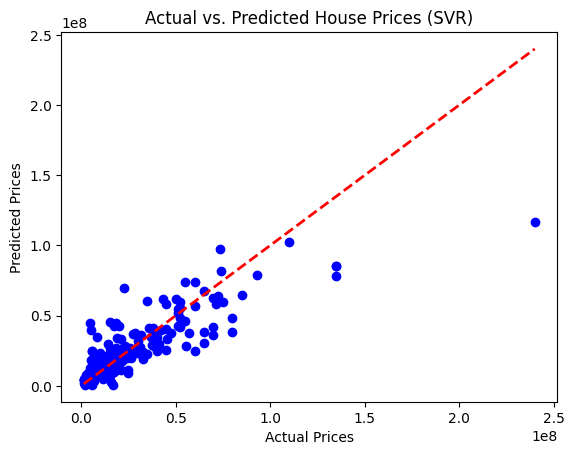

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVR)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train an SVR model
model = SVR(kernel='rbf')  # You can experiment with different kernels (linear, rbf, etc.)
model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Transform predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (SVR)")
plt.show()

In [ ]:
# import joblib
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# joblib.dump(model, 'model_delhi.joblib')
# joblib.dump(scaler_X, 'scaler_x_delhi.joblib')
# joblib.dump(scaler_y, 'scaler_y_delhi.joblib')

In [ ]:
new_X = pd.DataFrame({'Area': [1300], 'BHK': [3],'Bathroom': [2],'Furnishing':[1],'Parking':[1]})

# Standardize the new features using the same scaler from training
new_X_scaled = scaler_X.transform(new_X)

# Make predictions on the new feature vector
new_y_pred_scaled = model.predict(new_X_scaled)
new_y_pred = scaler_y.inverse_transform(new_y_pred_scaled.reshape(-1, 1)).ravel()
new_y_pred

array([12685477.72127725])

                                       Correlation Matrix                                       


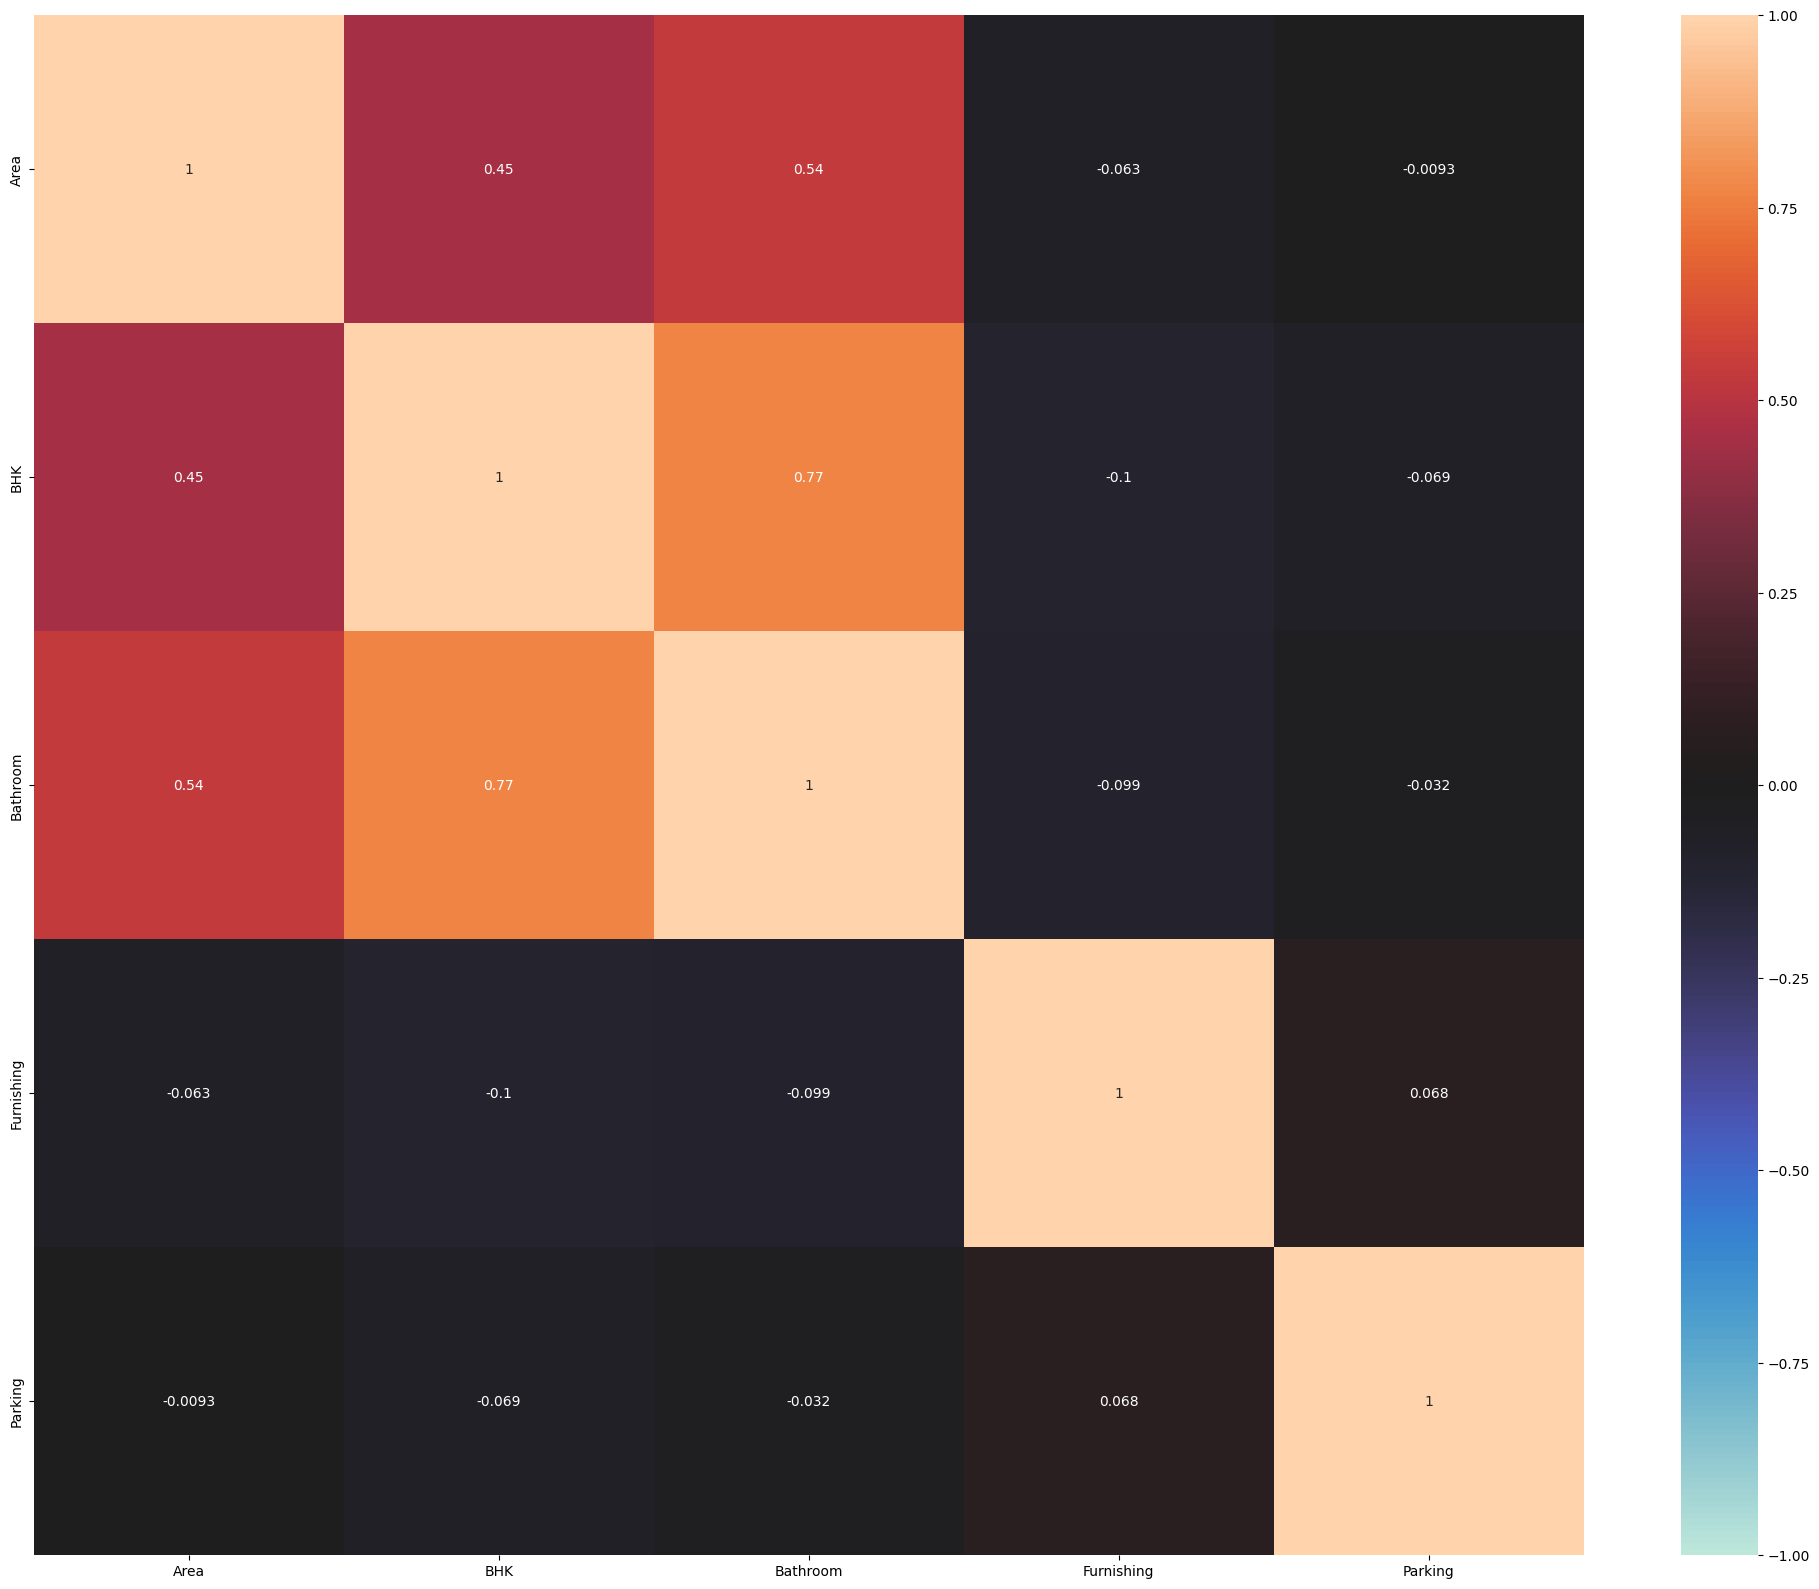

In [ ]:
import seaborn as sns
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

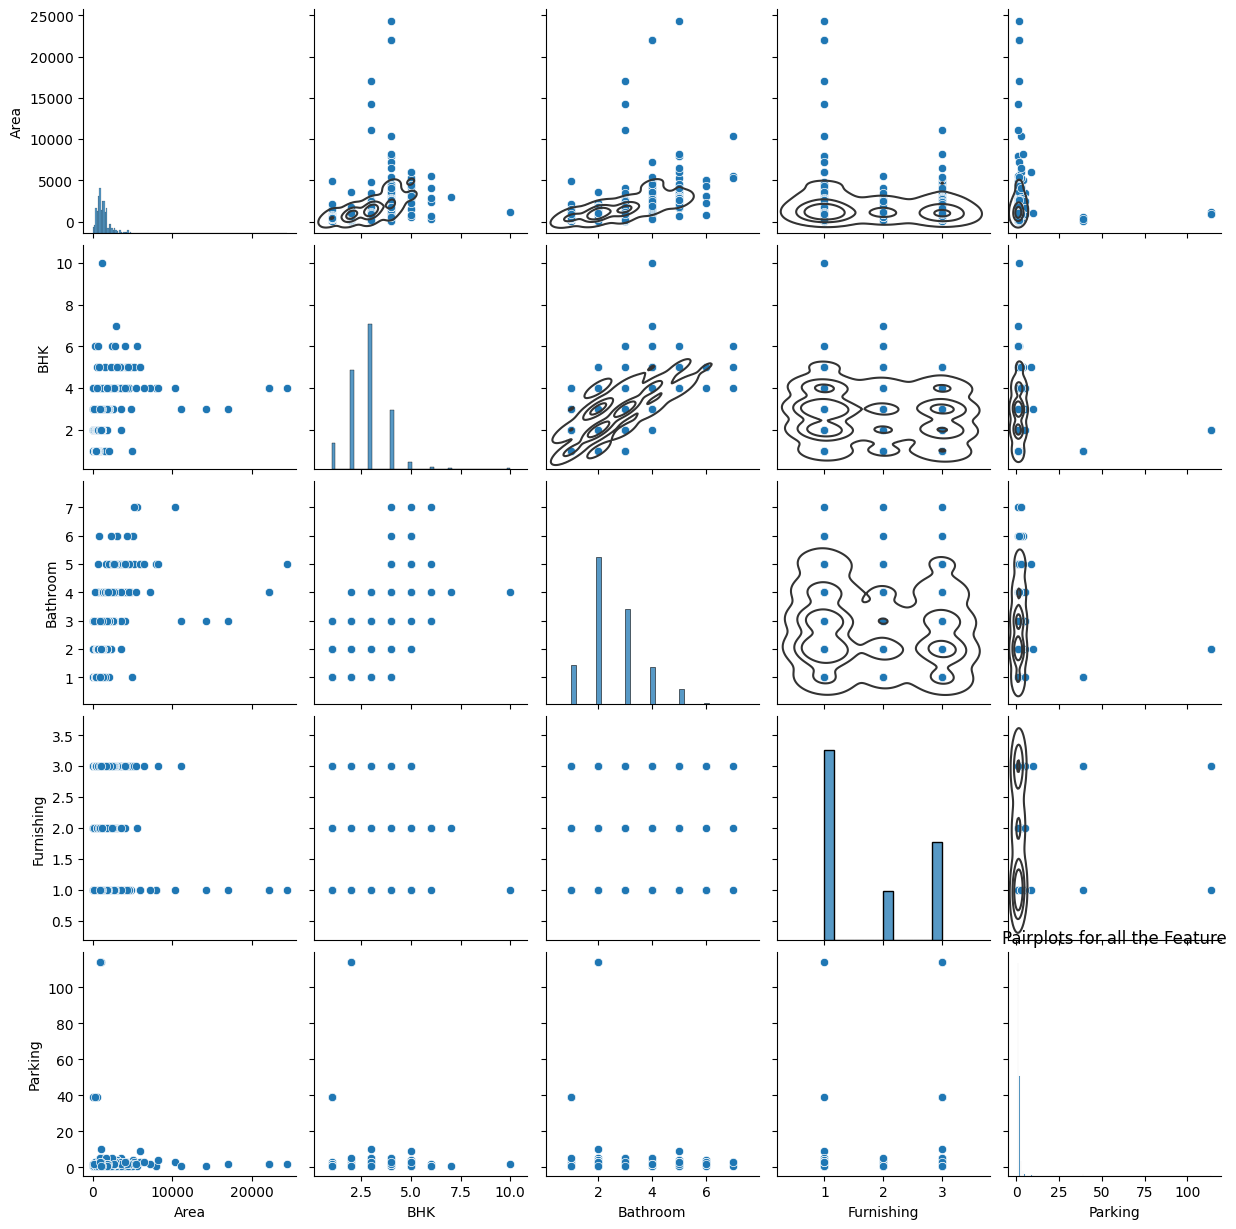

In [ ]:
g = sns.pairplot(X)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [ ]:
# from google.colab import files

# # Download the saved model and scaler files
# files.download('model_delhi.joblib')
# files.download('scaler_x_delhi.joblib')
# files.download('scaler_y_delhi.joblib')